In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:/Users/saleh/Downloads/saleh/Swinburne University/3rd Semester/Technology Innovation Project/TIP Project/FV2.csv'  # Replace with your local file path
data = pd.read_csv(file_path)

# Define weight factors for the scoring
tactic_weight = 1.0
privilege_weight = 2.0
sub_technique_bonus = 1.5
defenses_bypassed_weight = 1.0
prevalence_observation_weight = 1.5
geographic_spread_weight = 1.0

# Define a function to calculate the complexity score
def calculate_complexity(row):
    num_tactics = len(row['tactics'].split(',')) if pd.notna(row['tactics']) else 0
    privilege_score = privilege_weight if 'Administrator' in str(row['permissions required']) else 1
    sub_technique_score = sub_technique_bonus if row['is sub-technique'] == True else 0
    defenses_bypassed_score = len(str(row['defenses bypassed']).split(',')) * defenses_bypassed_weight if pd.notna(row['defenses bypassed']) else 0
    complexity_score = (num_tactics * tactic_weight) + (privilege_score * privilege_weight) + sub_technique_score + defenses_bypassed_score
    return complexity_score

# Define a function to calculate the prevalence score (simplified as an example)
def calculate_prevalence(row):
    num_observations = len(str(row['relationship citations']).split(',')) if pd.notna(row['relationship citations']) else 0
    geographic_spread = num_observations * geographic_spread_weight
    prevalence_score = (num_observations * prevalence_observation_weight) + geographic_spread
    return prevalence_score

# Apply the complexity and prevalence calculation to each row
data['Complexity Score'] = data.apply(calculate_complexity, axis=1)
data['Prevalence Score'] = data.apply(calculate_prevalence, axis=1)

# Calculate the overall score for the threat actor
data['Threat Actor Score'] = data['Complexity Score'] + data['Prevalence Score']

# Normalize the Threat Actor Score to a range of 1 to 500
min_score = data['Threat Actor Score'].min()
max_score = data['Threat Actor Score'].max()

# Normalize and round the scores
data['Threat Actor Score'] = data['Threat Actor Score'].apply(
    lambda x: round(1 + (499 * (x - min_score) / (max_score - min_score)))
)

# Save the result to a new CSV file
output_file_path = r'C:/Users/saleh/Downloads/saleh/Swinburne University/3rd Semester/Technology Innovation Project/TIP Project/FV2.csv'  # Replace with your desired output path
data.to_csv(output_file_path, index=False)

print(f"Scoring complete. Output saved to: {output_file_path}")


Scoring complete. Output saved to: C:/Users/saleh/Downloads/saleh/Swinburne University/3rd Semester/Technology Innovation Project/TIP Project/FV2.csv


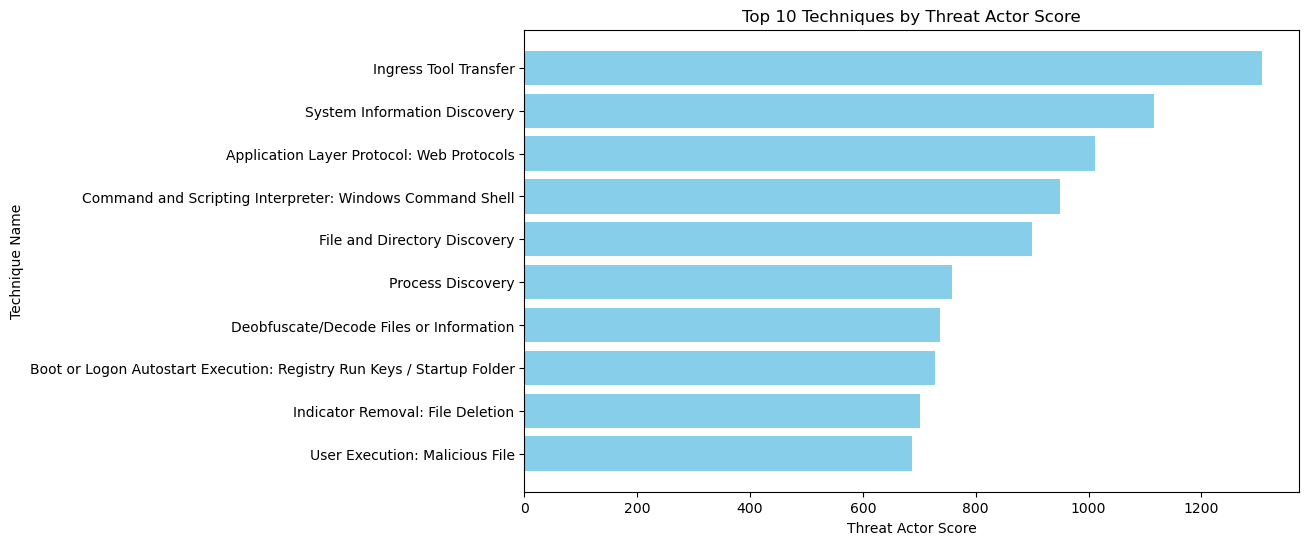

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the scored CSV
file_path = 'C:/Users/zeesh/OneDrive/Desktop/enterprise-attack-scored.csv'
data = pd.read_csv(file_path)

# Sort by Threat Actor Score and select top 10
top_techniques = data.nlargest(10, 'Threat Actor Score')

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_techniques['name'], top_techniques['Threat Actor Score'], color='skyblue')
plt.xlabel('Threat Actor Score')
plt.ylabel('Technique Name')
plt.title('Top 10 Techniques by Threat Actor Score')
plt.gca().invert_yaxis()  # To display the highest score at the top
plt.show()


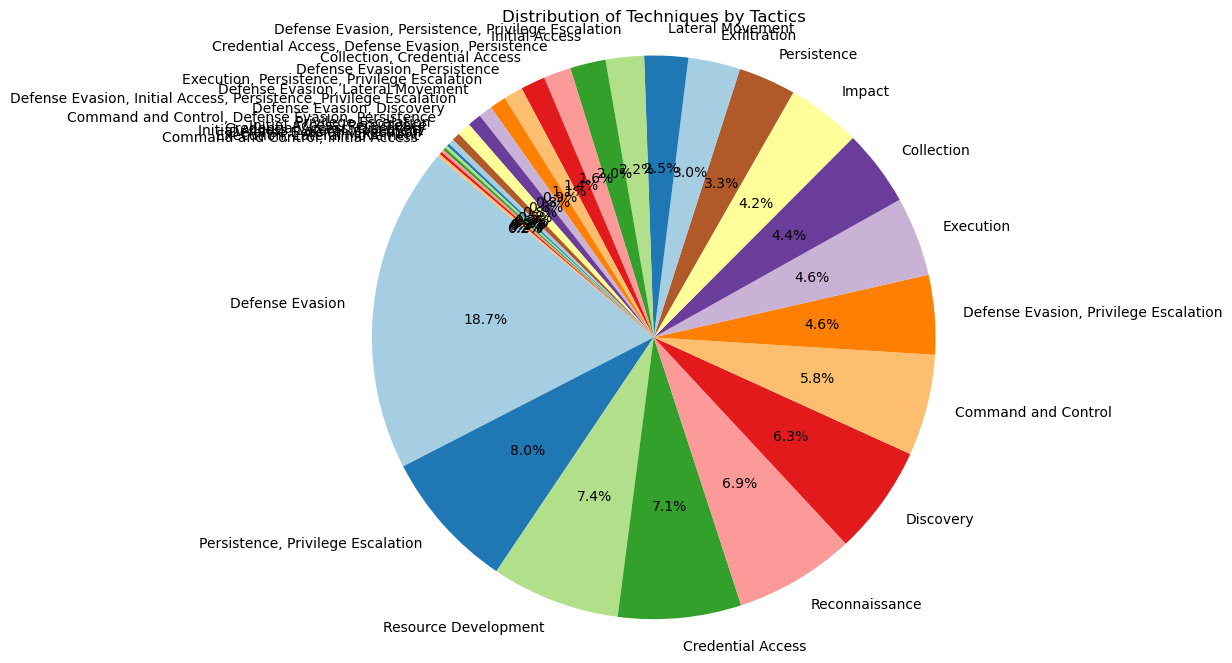

In [14]:
# Count the number of techniques by tactics
tactic_counts = data['tactics'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(tactic_counts, labels=tactic_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of Techniques by Tactics')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.show()


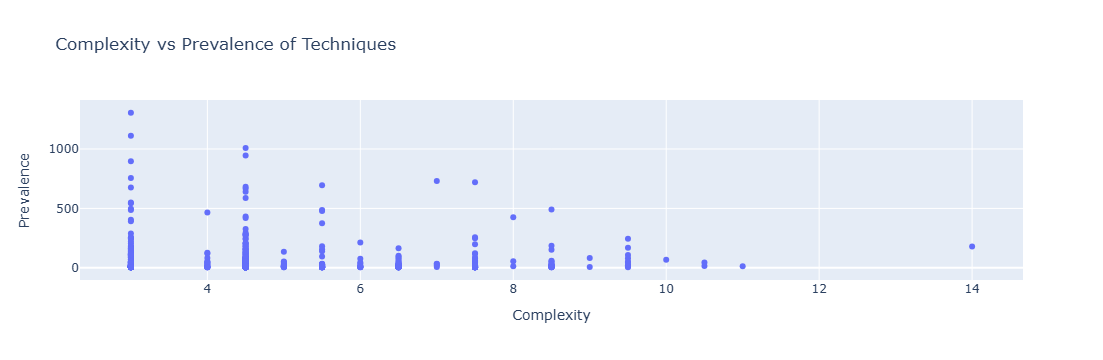

In [13]:
import plotly.express as px

# Create a scatter plot
fig = px.scatter(data, x='Complexity Score', y='Prevalence Score', hover_data=['name'],
                 title="Complexity vs Prevalence of Techniques",
                 labels={"Complexity Score": "Complexity", "Prevalence Score": "Prevalence"})

# Show the plot
fig.show()


C:\Users\zeesh\AppData\Local\Temp\ipykernel_97924\1573409583.py:2: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



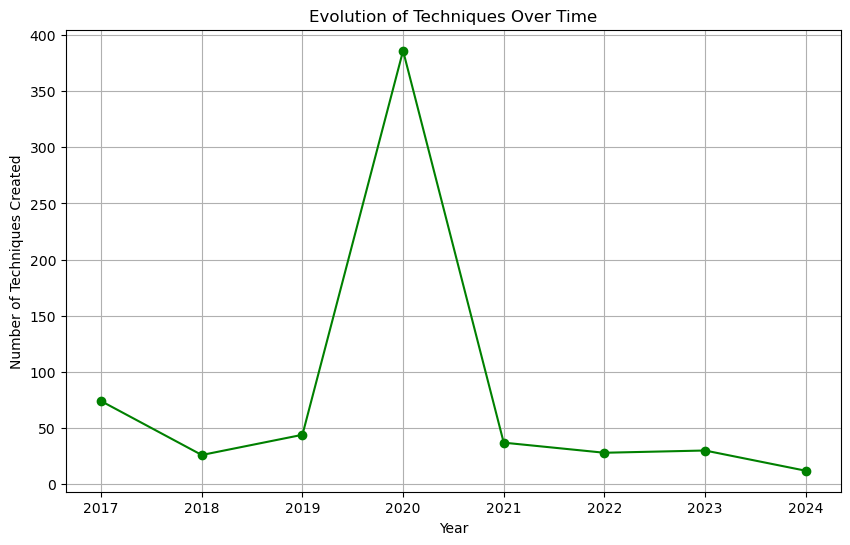

In [16]:
# Convert the 'created' column to datetime format
data['created'] = pd.to_datetime(data['created'], errors='coerce')

# Group techniques by year of creation
data['Year Created'] = data['created'].dt.year
techniques_by_year = data.groupby('Year Created').size()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(techniques_by_year.index, techniques_by_year.values, marker='o', color='green')
plt.xlabel('Year')
plt.ylabel('Number of Techniques Created')
plt.title('Evolution of Techniques Over Time')
plt.grid(True)
plt.show()


In [12]:
# Example assuming you had a 'Geographic Region' column in your dataset
# Let's create a dummy geographic data (you'll replace this with your actual data)

data['Region'] = ['North America', 'Europe', 'Asia', 'North America', 'Europe', 'Asia', 'Africa', 'North America', 'Europe', 'Asia']  # Replace with actual data

fig = px.choropleth(data, locations='Region',
                    locationmode='country names',  # Use 'ISO-3' if you have country codes
                    color='Threat Actor Score', 
                    hover_name='name',
                    title='Threat Actor Scores by Region')
fig.show()


ValueError: Length of values (10) does not match length of index (637)